## Scoping

### Project Goals

This project is designed to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that I have detemerined to be answered is that of whether


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preliminary Analysis

### Loading the Data

The first step I take is to load the provided data into a pandas DataFrame object so that it can be efficiently explored and manipulated in python.

First the file `profiles.csv` is loaded into the `df` DataFrame. It is subsequently displayed for examination.

In [3]:
df = pd.read_csv('profiles.csv', encoding = 'utf-8')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


There is no point in looking at the value counts of the `essay{number}` columns as they are more likely infinitely variable and will not have any repeating entries and this project doesn't involve NLP.

In [4]:
essays = [f'essay{i}' for i in range(0, 10, 1)]
df.drop(essays, axis = 1, inplace = True)

### Identifying the Data Characteristics

First it is advisable to look at the data types and columns presented to us in the data and determine how much data we are dealing with exactly.

Doing a few simple calls to variables of the dataframe reveals that our dating profiles data consists of 59,946 rows (or users) and 31 attributes/columns.

Additionally, we can see that there are a few columns with the `object` dtype that might be better classified as strings so they could potentially undergoe string operations in the future if need be.

In [5]:
print(f'Data types:\n{df.dtypes}\n')
print(f'Datasize: {df.shape}')
df = df.convert_dtypes()
df.dtypes
#Added after determining object attributes would be better served as strings.
#Essentially turns all our object attributes into strings.
#This also reveals that height has no need to be a float.

Data types:
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

Datasize: (59946, 21)


age                     Int64
body_type      string[python]
diet           string[python]
drinks         string[python]
drugs          string[python]
education      string[python]
ethnicity      string[python]
height                  Int64
income                  Int64
job            string[python]
last_online    string[python]
location       string[python]
offspring      string[python]
orientation    string[python]
pets           string[python]
religion       string[python]
sex            string[python]
sign           string[python]
smokes         string[python]
speaks         string[python]
status         string[python]
dtype: object

# Data Cleaning

First up is to clean the data and make sure it is suitable for use. My cleaning process for a single dataset consists of five steps:


1. Handling duplicates and rows
2. Simplifying and standardizng attributes 
3. Handling missing values
4. Handling outliers
5. Handling inconsitent attributes 

## Handling Duplicates

First let's check if there are any duplicate entries in the dataset. But it looks like we are all clear on duplicate entries.

In [6]:
df.duplicated().sum()

np.int64(0)

## Simplifying attributes

This section's general aim is to simplify primarily categorical attributes that have way too many different catagories.

From a brief look at the number of unique values and a little reference back up to our dtypes (plus a little behind the scenes checks on value counts) we can see that a few columns are up for a little simplification, these being:

1. education
2. speaks
3. pets
4. religion
5. sign
6. speaks
7. diet

Additionally we want to sort out the corrupted strings in:
1. offspring
2. sign

#NOTE INCOME IS FUNNY AS IT MIGHT AS WELL BE CATEGORICAL AS IT IS A SET OF NUMERICAL BRACKETS (ie. 20000, 100000, 80000) that people are put under.

In [7]:
df.nunique()


age               54
body_type         12
diet              18
drinks             6
drugs              3
education         32
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
orientation        3
pets              15
religion          45
sex                2
sign              48
smokes             5
speaks          7647
status             5
dtype: int64

### Simplifying Education

In [8]:
df.education.value_counts(dropna = False)

education
graduated from college/university    23959
graduated from masters program        8961
<NA>                                  6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
d

In [9]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [10]:
#create new column for education level
edu = ['space camp', 'high school', 'two-year college', 'college/university', 'law school', 'med school', 'masters', 'ph.d']
df['education_level'] = df['education'].apply(lambda x: replacer(edu, x))

#create new column for education status 
edu = ['dropped out', 'working on', 'graduated']
df['education_status'] = df['education'].apply(lambda x: replacer(edu, x, 'graduated'))

#get rid of the old education column
df.drop(columns = 'education', inplace = True)
df.education_status.value_counts(dropna = False)

education_status
graduated      40745
working on     10465
<NA>            6628
dropped out     2108
Name: count, dtype: int64

### Simplifying speaks

One of first things we can notice about our ethnicity values is that there are a lot of people who are an ethnicity onto themselves which might be interesting for anthropologists but unfortunately for us is not very good for ML models as they aren't very generalizable.

In [11]:
def long_handler(x, string1):
    if isinstance(x, str):
        x = x.split(",")

        if len(x) < 3:
            if len(x) == 1:
                return(x.pop())
            else:
                return x
        else:
            return string1
    
    else:
        return pd.NA


In [12]:
df.ethnicity = df.ethnicity.apply(lambda x: long_handler(x, 'mixed')) #does this work grouping all mixed people into one group?
df["ethnicity_1"] = df.ethnicity.apply(lambda x: x[0] if isinstance(x, list) else x)
df["ethnicity_2"] = df.ethnicity.apply(lambda x: x[1] if isinstance(x, list) else x)
df.drop(columns = ['ethnicity'], inplace = True)

df[["ethnicity_1", "ethnicity_2"]].head(10)

,ethnicity_1,ethnicity_2
0,asian,white
1,white,white
2,<NA>,<NA>
3,white,white
4,mixed,mixed
5,white,white
6,white,other
7,white,white
8,white,white
9,white,white


### Simplifying Pets

The `pets` column has a lot of different categories but can be easily simplified into two columns where cat and dog dispositions are represented seperately.

In [13]:
df.pets.value_counts(dropna = False)

pets
<NA>                               19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: Int64

In [14]:
def pet_sentiment(x, pet: str):

    if isinstance(x, str):
        if " and " in x:
            result = x.split(" and ")
            if pet == 'dog':
                result1 = result[0].removesuffix(" dogs")
                return result1
            elif pet == 'cat':
                result2 = result[1].removesuffix(" cats")
                return result2
    
        elif  pet == 'dog':
            if "dogs" in x:
                result1 = x.removesuffix(" dogs")
                return result1
            else:
                return 'no opinion'
        elif pet == 'cat':
            if "cats" in x:
                result2 = x.removesuffix(" cats")
                return result2
            else:
                return 'no opinion'
    else:   
        return pd.NA

In [15]:
df['dogs'] = df.pets.apply(lambda x: pet_sentiment(x, 'dog'))
df['cats'] = df.pets.apply(lambda x: pet_sentiment(x, 'cat'))

df.drop(columns = ['pets'], inplace = True)
df[['cats', 'dogs']].head(20)

,cats,dogs
0,likes,likes
1,likes,likes
2,has,no opinion
3,likes,no opinion
4,likes,likes
5,likes,no opinion
6,likes,likes
7,likes,likes
8,likes,likes
9,likes,likes


### Simplifying `religion`

In [16]:
def replacer(lst, x, string1 = None):
    if isinstance(x, str):
        for l in lst:
            if l.lower() in x.lower():
                return l
        if isinstance(string1, str):
            return string1
    else:
        return pd.NA

In [17]:
religions = ['christianity', 'islam', 'judaism', 'buddhism', 'hinduism', 'agnosticism', 'atheism', 'other']
df['religious_preference'] = df.religion.apply(lambda x: replacer(religions, x))


sentiment = ['laughing about it', 'not too serious about it', 'somewhat serious about it', 'very serious about it']
df['religious_sentiment'] = df.religion.apply(lambda x: replacer(sentiment, x, 'no opinion'))

df.drop(columns = ['religion'], inplace = True)

In [18]:
df[["religious_preference", "religious_sentiment"]].head(10)

,religious_preference,religious_sentiment
0,agnosticism,very serious about it
1,agnosticism,not too serious about it
2,<NA>,<NA>
3,<NA>,<NA>
4,<NA>,<NA>
5,atheism,no opinion
6,<NA>,<NA>
7,christianity,no opinion
8,christianity,not too serious about it
9,atheism,laughing about it


### Simplifying `sign`

In [19]:
df.sign.value_counts(dropna = False)

sign
<NA>                                             11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra

In [20]:
df.sign = df.sign.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
star_signs = ['gemini', 'scorpio', 'leo', 'virgo', 'cancer', 'taurus', 'libra', 'aries', 'aquarius', 'pisces', 'capricorn', 'sagittarius']
df['star_sign'] = df.sign.apply(lambda x: replacer(star_signs, x))

sign_sentiment = ['it\'s fun to think about', 'it doesn\'t matter', 'it matters a lot']
df['sign_sentiment'] = df.sign.apply(lambda x: replacer(sign_sentiment, x, 'no opinion'))

df.drop(columns = ['sign'], inplace = True)

In [21]:
df[['star_sign', 'sign_sentiment']].head(10)

,star_sign,sign_sentiment
0,gemini,no opinion
1,cancer,no opinion
2,pisces,it doesn't matter
3,pisces,no opinion
4,aquarius,no opinion
5,taurus,no opinion
6,virgo,no opinion
7,sagittarius,no opinion
8,gemini,it doesn't matter
9,cancer,it doesn't matter


### Simplifying `speaks`

In [22]:
df.speaks.value_counts(dropna = False)

speaks
english                                                                                              21828
english (fluently)                                                                                    6628
english (fluently), spanish (poorly)                                                                  2059
english (fluently), spanish (okay)                                                                    1917
english (fluently), spanish (fluently)                                                                1288
                                                                                                     ...  
english (fluently), polish (fluently), french (poorly), hungarian (poorly), italian (poorly)             1
english, spanish (fluently), hindi (okay), french (poorly)                                               1
english (okay), spanish (okay), hebrew (okay)                                                            1
english (fluently), slovenian 

In [23]:
df['english'] = df.speaks.apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
condition = ~df.speaks.isna() & ~df.speaks.str.contains('english', case = False, na = True)
df.loc[condition, "english"] = 'no english'
df.drop(columns = ['speaks'], inplace = True)
df['english'].head(10)

0               english
1    english (fluently)
2               english
3               english
4               english
5    english (fluently)
6               english
7               english
8               english
9    english (fluently)
Name: english, dtype: object

### Simplifying `offspring`

In [24]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: Int64

In [25]:
def kids_handler(x):
    if isinstance(x, str):
        result = x.split(" kid")[0]
        if result == "has a":
            return "has"
        else:
            return result
    else:
        return pd.NA

In [26]:
df.offspring = df.offspring.apply(lambda x: x.replace('&rsquo;', "\'") if isinstance(x, str) else x)
df['offspring'] = df.offspring.apply(lambda x: kids_handler(x))
df.offspring.value_counts(dropna = False)

offspring
<NA>            35561
doesn't have    16132
has              4919
doesn't want     2927
wants             225
might want        182
Name: count, dtype: int64

### Simplifying `diet`

In [27]:
diets = ['vegetarian', 'vegan', 'anything', 'kosher', 'halal', 'other']
df['diet'] = df['diet'].apply(lambda x: replacer(diets, x))

In [28]:
df.diet.value_counts(dropna = False)

diet
anything      27881
<NA>          24395
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

## Handling Missing Values

Next up is check which values have nulls and then handling them if they do in a way that is essentially up to my own discretion, however I try to use multiple techniques to handle nulls. 

If we check our columns we can see that theres a few rows that are 100% good to go on that front but beyond this we have a select few rows mainly on extraneous personal data that our users probably didn't want to or coulnd't be bothered to fill in.

My Null Handling Methodology:

1. Find how many values are missing + what percentage of the attribute is missing
2. Try and find out why they might be missing
3. Implement a solution to the nulls

In [29]:
df.isna().sum().sort_values()

age                         0
income                      0
location                    0
status                      0
sex                         0
orientation                 0
last_online                 0
height                      3
english                    50
drinks                   2985
body_type                5296
smokes                   5512
ethnicity_1              5680
ethnicity_2              5680
education_status         6628
education_level          6628
job                      8198
sign_sentiment          11056
star_sign               11056
drugs                   14080
dogs                    19921
cats                    19921
religious_sentiment     20226
diet                    24395
religious_preference    24984
offspring               35561
dtype: int64

### Removing High Null Rows

In [30]:
print("DataFrame shape prior to removal: ", df.shape)
df['null_count'] = df.isna().sum(axis = 1)
df = df[df['null_count'] < (0.4 * df.shape[1])]
df.drop(columns = ['null_count'], inplace = True)
print("DataFrame shape post removal: ", df.shape)

DataFrame shape prior to removal:  (59946, 26)
DataFrame shape post removal:  (57804, 26)


### Handling `height` nulls

`height` only has 3 null values so it's debatable if we should just get rid of them (it is only just 3 rows right?) This method is called **listwise deletion**.

In [31]:
df = df[~df['height'].isna()]

### Handling `english` Nulls

`english` is also low enough to be handled by **listwise deletion**.

In [32]:
df = df[~df['english'].isna()]

### Handling `drinks` nulls

In [33]:
df['drinks'] = df['drinks'].fillna('rather not say')

### Handling `body_type` nulls

All nulls in the body type column are replaced with average. This is done as the majority of people would have the average body type anyway.

Note: Think about this assumption more critically.

Note: This is an assumption, put it in the assumptions section

In [34]:
df['body_type'] = df['body_type'].fillna('average')

### Handling `smokes` nulls

In [35]:
df['smokes'] = df['smokes'].fillna('rather not say')

### Handling `ethnicity_1` and `ethnicity_2` nulls

In [36]:
df['ethnicity_1'] = df['ethnicity_1'].fillna('unspecified')
df['ethnicity_2'] = df['ethnicity_2'].fillna('unspecified')

### Handling `education_status` and `education level` nulls

In [37]:
print(df.education_level.value_counts(dropna = False))
df.education_status.value_counts(dropna = False)

education_level
college/university    31150
masters               10788
<NA>                   4980
two-year college       3011
ph.d                   2364
high school            1711
space camp             1678
law school             1411
med school              672
Name: count, dtype: int64


education_status
graduated      40309
working on     10371
<NA>            4980
dropped out     2105
Name: count, dtype: int64

### Handling `job` nulls

In [38]:
df['job'] = df['job'].fillna('unspecified')

### Handling `sign_sentiment` and `star_sign` nulls

In [39]:
df.drop(columns = ['sign_sentiment', 'star_sign'], inplace = True)

### Handling `drugs` nulls

In [40]:
df['drugs'] = df['drugs'].fillna('unspecified')

### Handling `dogs` and `cats`

In [41]:
df.drop(columns = ['dogs', 'cats'], inplace = True)

### Handling `religous_sentiment` and `religous_preference` nulls

In [42]:
df['religious_sentiment'] = df['religious_sentiment'].fillna('not specified')
df['religious_preference'] = df['religious_preference'].fillna('not specified')

### Handling `diet` nulls

In [43]:
df['diet'] = df['diet'].fillna('missing')

In [44]:
df.drop(columns = ['offspring'], inplace = True)

## Handling Outliers

### Handling `age` outliers

In [45]:
df.dtypes[df.dtypes == pd.Int64Dtype()]

age       Int64
height    Int64
income    Int64
dtype: object

In [46]:
#age is numerical so describe should give us a good idea of the distribution of the values (we already know the age column contains no nulls)
df['age'].describe()

count      57765.0
mean     32.388782
std        9.46056
min           18.0
25%           26.0
50%           30.0
75%           37.0
max          109.0
Name: age, dtype: Float64

<Axes: xlabel='age'>

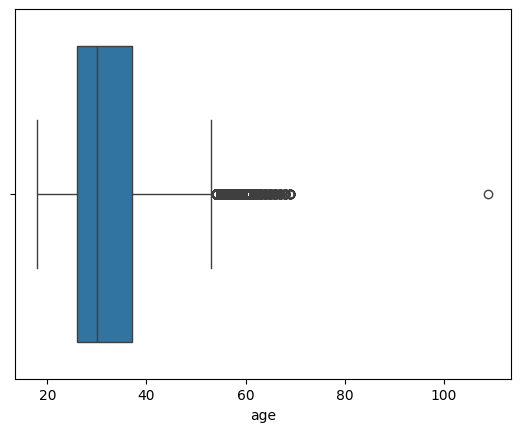

In [47]:
sns.boxplot(data = df, x = 'age')

In [48]:
#ages above 100 are removed
df = df[df["age"] <= 100]
df['age'].describe() #resulting distribution looks a lot more realistic

count      57764.0
mean     32.387456
std        9.45527
min           18.0
25%           26.0
50%           30.0
75%           37.0
max           69.0
Name: age, dtype: Float64

<Axes: xlabel='age'>

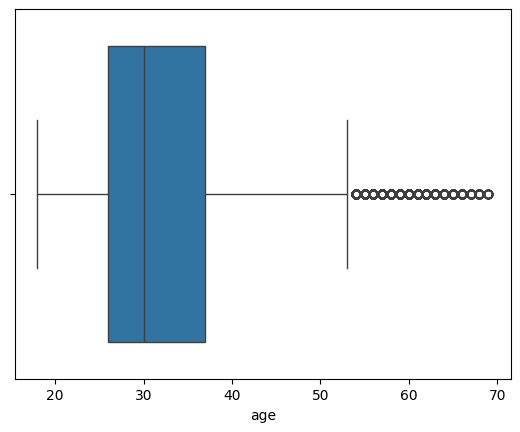

In [49]:
sns.boxplot(data = df, x = 'age')

### Handling `height` Outliers

Next is handling height, and taking a look immediately at the results of the `.describe()` method we can see  a big problem. our min height is someone who claims to be one inch tall. Moving on to the box plot we can see that a few people are also claiming to have a height smaller than the smallest person in the world Chandra Bahadur Dangi who is 21.5 inches tall. So let's immediately remove these jokers from our dataset.

In [50]:
df['height'].describe()

count      57764.0
mean     68.277682
std       3.988154
min            1.0
25%           66.0
50%           68.0
75%           71.0
max           95.0
Name: height, dtype: Float64

<Axes: xlabel='height'>

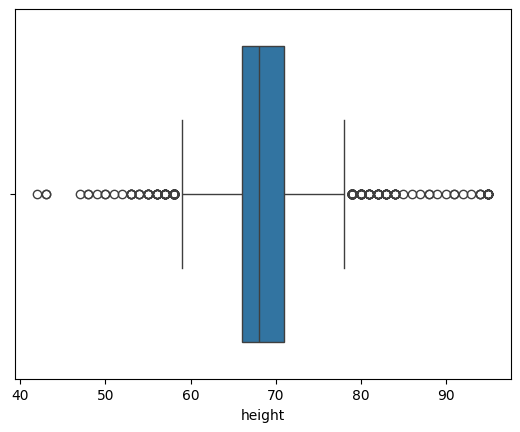

In [61]:
sns.boxplot(data = df, x = 'height')

In [52]:
df = df[df["height"] >= 40]
df['height'].describe()

count      57746.0
mean     68.291085
std       3.907463
min           42.0
25%           66.0
50%           68.0
75%           71.0
max           95.0
Name: height, dtype: Float64

### Handling `income` outliers

One Thing we can notice about our income attributre is that most of our entries are in the category -1

In [53]:
df.income.value_counts()

income
-1         46309
20000       2944
100000      1606
80000       1104
30000       1045
40000       1002
50000        971
60000        734
70000        704
150000       626
1000000      510
250000       146
500000        45
Name: count, dtype: Int64

In [64]:
df.loc[df['income'] == -1, 'income'] = 0

### Handling Inconsistent Variables

In [65]:
df.location.value_counts(dropna = False)

location
san francisco, california    29896
oakland, california           6998
berkeley, california          4068
san mateo, california         1286
palo alto, california         1031
                             ...  
denver, colorado                 1
seattle, washington              1
cincinnati, ohio                 1
phoenix, arizona                 1
rochester, michigan              1
Name: count, Length: 194, dtype: Int64

### Body Type Variation

As we can see most people on the site consider themselves to be either average or fit/athletic, you would expect this as most people with societaly dictated "negative" body type would not be confident enough to be on a dating website or less likely to report this feature of themselves accurately. 

In [55]:
df['body_type'].value_counts(dropna = False)

body_type
average           18909
fit               12342
athletic          11389
thin               4594
curvy              3873
a little extra     2586
skinny             1698
full figured        992
overweight          434
jacked              402
used up             341
rather not say      186
Name: count, dtype: Int64

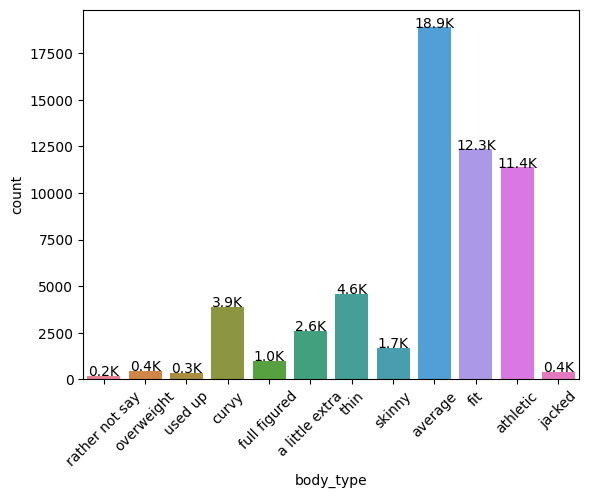

In [56]:
#My order is based on my own determination of a logical order for the available values for body_type based on my own perception of less fit to most fit
my_order = ['rather not say', 'overweight', 'used up', 'curvy', 'full figured', 'a little extra', 'thin', 'skinny', 'average', 'fit', 'athletic', 'jacked']
ax = sns.countplot(data = df, x = 'body_type', hue = 'body_type', order = my_order, hue_order = my_order)

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

### Handling Diet Nulls

So when we look at the diet data we see that a wopping 68% of the data is NA so our users didnt specify diet data.

It would be best to keep set nulls as a new category ("not specified")

In [57]:
###### I FIND THIS INSUFFICIENT ######
# Probably want to compare the distribution of missing values according to age (maybe other variables) and present values to see if this missingness is actually random 
df['diet'] = df['diet'].fillna('anything')

### Diet Variation

Most people on the site expectedly have little to no dietary restriction or preference. Neglibile amounts of people on the dating site conform to religious diets (Maybe our site isn't that appealling to a religious audience)

In [58]:

df['diet'].value_counts(dropna= False)

diet
anything      27663
missing       22495
vegetarian     4931
other          1771
vegan           695
kosher          114
halal            77
Name: count, dtype: int64

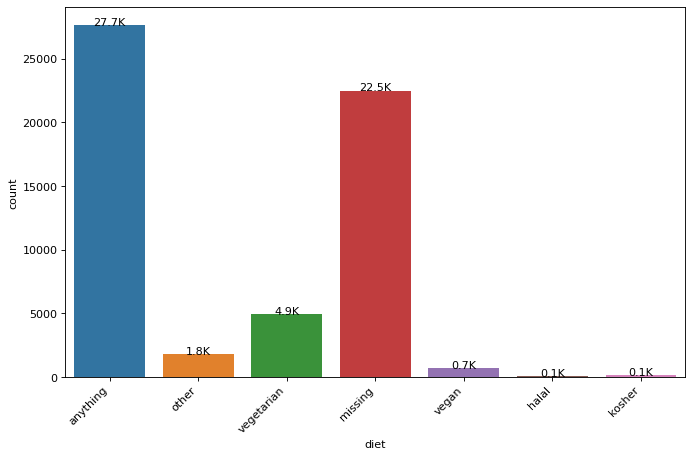

In [59]:
plt.figure(figsize=(10,6), dpi=80)

ax = sns.countplot(data = df, x = 'diet', hue = 'diet')

#Just wanted to put in the count values on top of each bar so as to better interpret the data for ease of interpretability. This is all done in 1000s points for fit.
for axi in ax.patches:
    height = axi.get_height()
    ax.text(axi.get_x()+axi.get_width()/2.,
            height + 3,
            f'{round(axi.get_height() / 1000, 1)}K',
            ha="center")

#rotate labels for no overlap     
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, ha = "right", x = -0.1)

plt.show()

###  Handling Drinks and Drugs Nulls

So we have a few missing drugs and less amount of missing drinks. This would be a good time to test if people are just leaving the field empty for personal reasons or is it just random?

From looking at the p values of the prevalence of drinks and drugs with other factors such as age, sex, income, edication and religion. 

1. We can see that people with certain religious beliefs are likely to skip drug related questions and to a lesser extent drink related questions.
2. Socioeconomic and demograpgic factors influence response rates for these attributes

In [60]:
from scipy.stats import chi2_contingency

def chi_square_missing(df, missing_col, categorical_col): # < 0.05 returned suggests MAR
    df_copy = df.copy()
    df_copy['missing'] = df_copy[missing_col].isna().astype(int)

    contingency_table = pd.crosstab(df_copy['missing'], df_copy[categorical_col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return p

for col in ['age', 'sex', 'education', 'income', 'religion']:
    p_value = chi_square_missing(df, 'drugs', col)
    print(f"Missingness in drugs vs. {col}: p-value = {p_value}")

    p_value = chi_square_missing(df, 'drinks', col)
    print(f"Missingness in drinks vs. {col}: p-value = {p_value}")

Missingness in drugs vs. age: p-value = 1.0
Missingness in drinks vs. age: p-value = 1.0
Missingness in drugs vs. sex: p-value = 1.0
Missingness in drinks vs. sex: p-value = 1.0


KeyError: 'education'

### Drink and Drugs Variation

While the drinks attribute has a 

In [ ]:
print(df['drugs'].value_counts(dropna = False), "\n")
print(df['drinks'].value_counts(dropna = False))

In [ ]:
ax = sns.countplot(data = df[df['drugs'] != 'never'], x = 'drinks', hue = 'drugs', )
plt.show()

### Education Variation

This attribute is need of serious cleaning!

In [ ]:
edu_desc = df['education'].describe()
print(edu_desc)
df['education'].value_counts()